In [2]:
import torch
import os
import matplotlib.pyplot as plt
from model_config import ModelConfig
from pruning_methods.wanda import wanda_pruning
from pruning_methods.magnitude import magnitude_pruning
from evaluation_pruning import global_evaluation, generate_text, count_parameters
from data_loading import get_wikitext2
from dotenv import load_dotenv
from plot_functions import plot_perplexity, compare_prompt


In [2]:

load_dotenv()

token = os.getenv("HUGGINGFACE_TOKEN")

llama_model = "meta-llama/Llama-3.2-1B"
modelConfig = ModelConfig(token=token)
model = modelConfig.load_llm()

Loading model 'facebook/opt-350m' from cache directory '.my_cache/llm_weights/'...


/home/lyes/Downloads/SCIA/NLP2/pruning-llm-nlp-project/.venv/lib/python3.10/site-packages/torch/cuda/__init__.py:716: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


## Magnitude Pruning

In [8]:
prunedModelConfig = modelConfig.copy_model()
original_model = modelConfig.model
prunned_model = prunedModelConfig.model

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
original_model.to(device)
prunned_model.to(device)

results = []
ratios = [0.1, 0.2, 0.3]

trainloader , testloader = get_wikitext2(modelConfig.nsamples, modelConfig.seed, modelConfig.seqlen, modelConfig.tokenizer)

for ratio in ratios:
    print(f"Pruning ratio: {ratio}")
    tmpModelConfig = modelConfig.copy_model()

    if ratio == 0:
        pruning_result = magnitude_pruning(tmpModelConfig.model, ratio)

    results.append(global_evaluation(tmpModelConfig, trainloader=trainloader, testloader=testloader, is_structured=False, device=device))

    print(count_parameters(tmpModelConfig.model))
    print(count_parameters(modelConfig.model))


KeyboardInterrupt: 

[662538026, 662538026, 662538026, 662538026, 662538026, 662538026, 662538026, 662538026, 662538026]


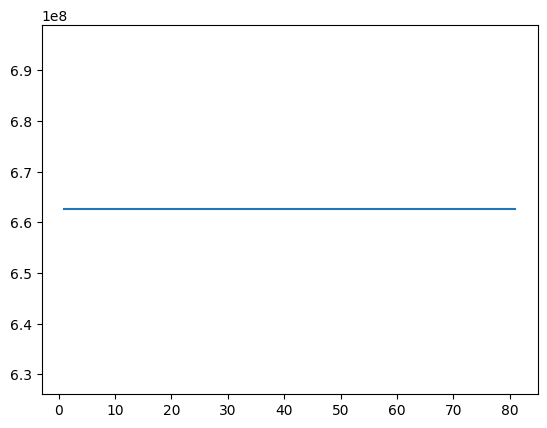

In [8]:
# Plot memory size over pruning ratio
model_size_bytes = [result["memory"]["model_size_bytes"] for result in results]
print(model_size_bytes)
plt.plot(ratios, [result["memory"]["model_size_bytes"] for result in results])
# print()

## Wanda Pruning

In [ ]:
# wanda_pruning(modelConfig)